In [1]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l
fair_probs = torch.ones([6]) / 6

In [3]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [5]:
counts =  multinomial.Multinomial(1000, fair_probs).sample()

In [7]:
counts / 1000

tensor([0.1670, 0.1490, 0.1780, 0.1680, 0.1630, 0.1750])

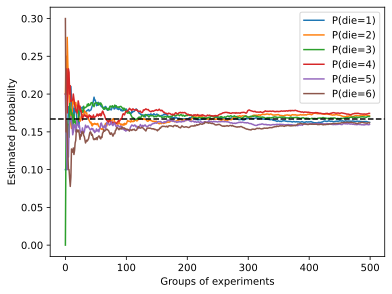

In [8]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

In [9]:
print(counts)
print(cum_counts)
print(estimates)


tensor([[1., 2., 0., 2., 2., 3.],
        [1., 3., 3., 2., 1., 0.],
        [1., 1., 2., 3., 1., 2.],
        ...,
        [0., 1., 2., 3., 1., 3.],
        [0., 2., 1., 4., 1., 2.],
        [2., 1., 2., 1., 4., 0.]])
tensor([[  1.,   2.,   0.,   2.,   2.,   3.],
        [  2.,   5.,   3.,   4.,   3.,   3.],
        [  3.,   6.,   5.,   7.,   4.,   5.],
        ...,
        [811., 853., 848., 867., 794., 807.],
        [811., 855., 849., 871., 795., 809.],
        [813., 856., 851., 872., 799., 809.]])
tensor([[0.1000, 0.2000, 0.0000, 0.2000, 0.2000, 0.3000],
        [0.1000, 0.2500, 0.1500, 0.2000, 0.1500, 0.1500],
        [0.1000, 0.2000, 0.1667, 0.2333, 0.1333, 0.1667],
        ...,
        [0.1629, 0.1713, 0.1703, 0.1741, 0.1594, 0.1620],
        [0.1625, 0.1713, 0.1701, 0.1745, 0.1593, 0.1621],
        [0.1626, 0.1712, 0.1702, 0.1744, 0.1598, 0.1618]])
